In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verificar se GPU está disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Carregar o arquivo CSV
file_path = 'data_tp1'
data = pd.read_csv(file_path, header=None)

# Normalizar os dados de entrada (pixels)
X = data.iloc[:, 1:].values / 255.0

# Transformar os rótulos
Y = data.iloc[:, 0].values

# Converter para tensores PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.long).to(device)

# Criar DataLoader
dataset = TensorDataset(X_tensor, Y_tensor)
batch_size = 64
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        return out

# Função de perda
criterion = nn.CrossEntropyLoss()

In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            # Clipping de gradiente
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)
        if epoch % 10 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

In [ ]:
# Configuração dos parâmetros
input_size = 784  # 28x28 pixels
hidden_sizes = [25, 50, 100]
num_classes = 10  # 10 dígitos
num_epochs = 100  # 100 épocas
learning_rates = [0.5, 1, 10]

Gradient Descent - Hidden Size: 25, Learning Rate: 0.5
Epoch [0/100], Loss: 2.5744
Epoch [10/100], Loss: 0.2999
Epoch [20/100], Loss: 0.1332
Epoch [30/100], Loss: 0.0764
Epoch [40/100], Loss: 0.0464
Epoch [50/100], Loss: 0.0342
Epoch [60/100], Loss: 0.0246
Epoch [70/100], Loss: 0.0193
Epoch [80/100], Loss: 0.0155
Epoch [90/100], Loss: 0.0131
Gradient Descent - Hidden Size: 25, Learning Rate: 1
Epoch [0/100], Loss: 2.0519
Epoch [10/100], Loss: 0.1712
Epoch [20/100], Loss: 0.0532
Epoch [30/100], Loss: 0.0260
Epoch [40/100], Loss: 0.0166
Epoch [50/100], Loss: 0.0125
Epoch [60/100], Loss: 0.0096
Epoch [70/100], Loss: 0.0078
Epoch [80/100], Loss: 0.0066
Epoch [90/100], Loss: 0.0056
Gradient Descent - Hidden Size: 25, Learning Rate: 10
Epoch [0/100], Loss: 6.2736
Epoch [10/100], Loss: 4.6389
Epoch [20/100], Loss: 4.9310
Epoch [30/100], Loss: 4.1060
Epoch [40/100], Loss: 3.5046
Epoch [50/100], Loss: 3.2001
Epoch [60/100], Loss: 3.1602
Epoch [70/100], Loss: 3.1034
Epoch [80/100], Loss: 3.0817


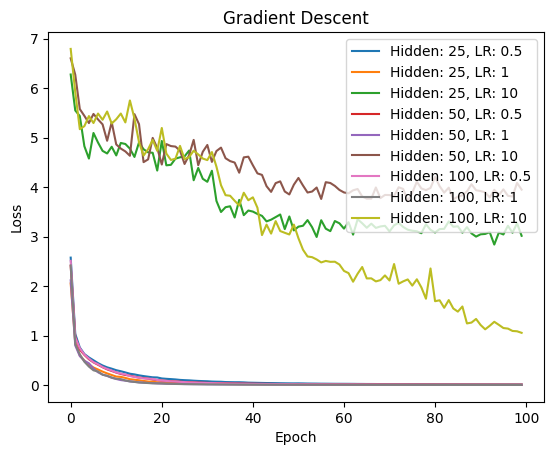

In [ ]:
gd_results = {}

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        print(f'Gradient Descent - Hidden Size: {hidden_size}, Learning Rate: {lr}')

        model = NeuralNet(input_size, hidden_size, num_classes).to(device)
        optimizer = optim.SGD(model.parameters(), lr=lr)
        losses = train_model(model, train_loader, criterion, optimizer, num_epochs)
        gd_results[(hidden_size, lr)] = losses
        plt.plot(losses, label=f'Hidden: {hidden_size}, LR: {lr}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Gradient Descent')
plt.show()

Stochastic Gradient Descent - Hidden Size: 25, Learning Rate: 0.5
Epoch [0/100], Loss: 2.6675
Epoch [10/100], Loss: 1.5261
Epoch [20/100], Loss: 0.9361
Epoch [30/100], Loss: 0.8485
Epoch [40/100], Loss: 0.6723
Epoch [50/100], Loss: 0.6083
Epoch [60/100], Loss: 0.4380
Epoch [70/100], Loss: 0.4389
Epoch [80/100], Loss: 0.2110
Epoch [90/100], Loss: 0.2683
Stochastic Gradient Descent - Hidden Size: 25, Learning Rate: 1
Epoch [0/100], Loss: 5.6442
Epoch [10/100], Loss: 4.6316
Epoch [20/100], Loss: 3.2463
Epoch [30/100], Loss: 3.3128
Epoch [40/100], Loss: 3.0013
Epoch [50/100], Loss: 2.6042
Epoch [60/100], Loss: 2.4731
Epoch [70/100], Loss: 2.4054
Epoch [80/100], Loss: 2.3383
Epoch [90/100], Loss: 2.2842
Stochastic Gradient Descent - Hidden Size: 25, Learning Rate: 10
Epoch [0/100], Loss: 47.6524
Epoch [10/100], Loss: 54.1091
Epoch [20/100], Loss: 53.8295
Epoch [30/100], Loss: 54.2515
Epoch [40/100], Loss: 53.9040
Epoch [50/100], Loss: 54.2974
Epoch [60/100], Loss: 54.1565
Epoch [70/100], Lo

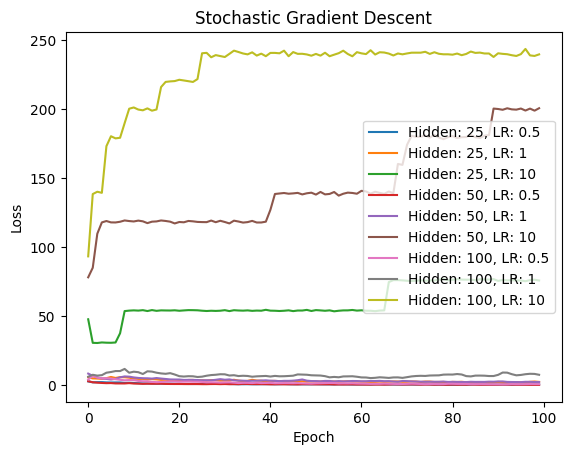

In [ ]:
sgd_results = {}

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        print(f'Stochastic Gradient Descent - Hidden Size: {hidden_size}, Learning Rate: {lr}')

        model = NeuralNet(input_size, hidden_size, num_classes).to(device)
        optimizer = optim.SGD(model.parameters(), lr=lr)
        sgd_loader = DataLoader(dataset, batch_size=1, shuffle=True)
        losses = train_model(model, sgd_loader, criterion, optimizer, num_epochs)
        sgd_results[(hidden_size, lr)] = losses
        plt.plot(losses, label=f'Hidden: {hidden_size}, LR: {lr}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Stochastic Gradient Descent')
plt.show()

Mini-Batch 10 Gradient Descent - Hidden Size: 25, Learning Rate: 0.5
Epoch [0/100], Loss: 1.3552
Epoch [10/100], Loss: 0.0782
Epoch [20/100], Loss: 0.0152
Epoch [30/100], Loss: 0.0093
Epoch [40/100], Loss: 0.0057
Epoch [50/100], Loss: 0.0043
Epoch [60/100], Loss: 0.0034
Epoch [70/100], Loss: 0.0028
Epoch [80/100], Loss: 0.0024
Epoch [90/100], Loss: 0.0021
Mini-Batch 10 Gradient Descent - Hidden Size: 25, Learning Rate: 1
Epoch [0/100], Loss: 1.5480
Epoch [10/100], Loss: 0.1925
Epoch [20/100], Loss: 0.0634
Epoch [30/100], Loss: 0.0090
Epoch [40/100], Loss: 0.0057
Epoch [50/100], Loss: 0.0038
Epoch [60/100], Loss: 0.0030
Epoch [70/100], Loss: 0.0025
Epoch [80/100], Loss: 0.0022
Epoch [90/100], Loss: 0.0019
Mini-Batch 10 Gradient Descent - Hidden Size: 25, Learning Rate: 10
Epoch [0/100], Loss: 13.0375
Epoch [10/100], Loss: 9.7185
Epoch [20/100], Loss: 8.9166
Epoch [30/100], Loss: 9.1690
Epoch [40/100], Loss: 9.1505
Epoch [50/100], Loss: 9.1951
Epoch [60/100], Loss: 8.8261
Epoch [70/100],

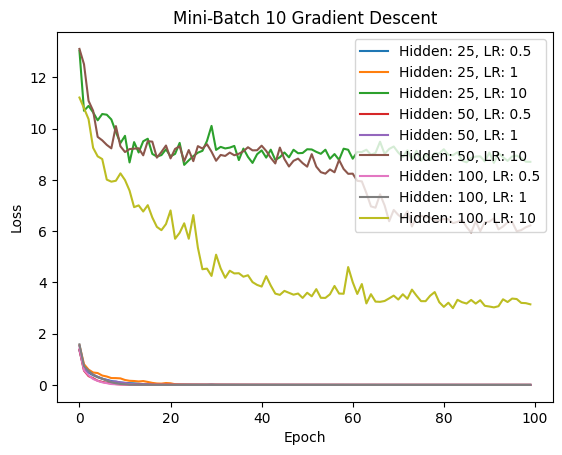

In [ ]:
mbgd_results_10 = {}

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        print(f'Mini-Batch 10 Gradient Descent - Hidden Size: {hidden_size}, Learning Rate: {lr}')

        model = NeuralNet(input_size, hidden_size, num_classes).to(device)
        optimizer = optim.SGD(model.parameters(), lr=lr)
        mbgd_loader_10 = DataLoader(dataset, batch_size=10, shuffle=True)
        losses = train_model(model, mbgd_loader_10, criterion, optimizer, num_epochs)
        mbgd_results_10[(hidden_size, lr)] = losses
        plt.plot(losses, label=f'Hidden: {hidden_size}, LR: {lr}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Mini-Batch 10 Gradient Descent')
plt.show()

Mini-Batch 50 Gradient Descent - Hidden Size: 25, Learning Rate: 0.5
Epoch [0/100], Loss: 2.2391
Epoch [10/100], Loss: 0.2465
Epoch [20/100], Loss: 0.0998
Epoch [30/100], Loss: 0.0514
Epoch [40/100], Loss: 0.0320
Epoch [50/100], Loss: 0.0228
Epoch [60/100], Loss: 0.0174
Epoch [70/100], Loss: 0.0140
Epoch [80/100], Loss: 0.0116
Epoch [90/100], Loss: 0.0099
Mini-Batch 50 Gradient Descent - Hidden Size: 25, Learning Rate: 1
Epoch [0/100], Loss: 1.8850
Epoch [10/100], Loss: 0.1559
Epoch [20/100], Loss: 0.0476
Epoch [30/100], Loss: 0.0223
Epoch [40/100], Loss: 0.0142
Epoch [50/100], Loss: 0.0102
Epoch [60/100], Loss: 0.0080
Epoch [70/100], Loss: 0.0065
Epoch [80/100], Loss: 0.0054
Epoch [90/100], Loss: 0.0046
Mini-Batch 50 Gradient Descent - Hidden Size: 25, Learning Rate: 10
Epoch [0/100], Loss: 6.7879
Epoch [10/100], Loss: 5.8749
Epoch [20/100], Loss: 5.0508
Epoch [30/100], Loss: 4.9672
Epoch [40/100], Loss: 4.8850
Epoch [50/100], Loss: 4.8649
Epoch [60/100], Loss: 4.6721
Epoch [70/100], 

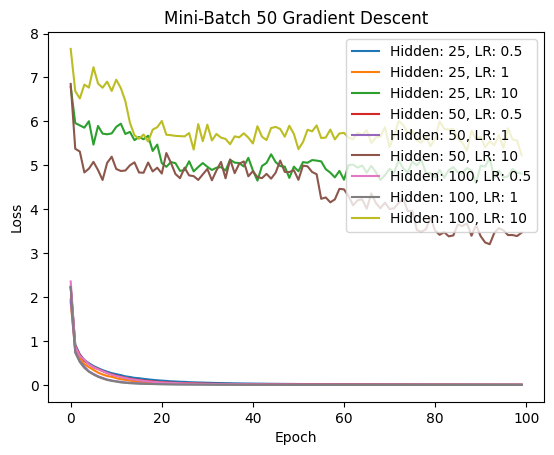

In [ ]:
mbgd_results_50 = {}

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        print(f'Mini-Batch 50 Gradient Descent - Hidden Size: {hidden_size}, Learning Rate: {lr}')

        model = NeuralNet(input_size, hidden_size, num_classes).to(device)
        optimizer = optim.SGD(model.parameters(), lr=lr)
        mbgd_loader_50 = DataLoader(dataset, batch_size=50, shuffle=True)
        losses = train_model(model, mbgd_loader_50, criterion, optimizer, num_epochs)
        mbgd_results_50[(hidden_size, lr)] = losses
        plt.plot(losses, label=f'Hidden: {hidden_size}, LR: {lr}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Mini-Batch 50 Gradient Descent')
plt.show()


## Conclusão sobre os Resultados dos Métodos de Cálculo de Gradiente

Os resultados dos experimentos com diferentes métodos de cálculo de gradiente (Gradient Descent, Stochastic Gradient Descent e Mini-Batch Gradient Descent) foram analisados e são apresentados nos gráficos fornecidos. Abaixo, detalhamos as observações e conclusões para cada método.

### Gradient Descent (GD)

**Observações:**
- A taxa de aprendizado mais alta (LR: 10) resulta em um comportamento oscilante e instável.
- Taxas de aprendizado menores (LR: 0.5 e 1) mostram uma convergência mais estável.
- Camadas ocultas maiores (50 e 100 unidades) tendem a ter uma diminuição mais suave na perda.

**Conclusão:**
- O Gradient Descent tradicional mostra uma convergência estável com taxas de aprendizado mais baixas. Taxas de aprendizado muito altas podem causar instabilidade e não são recomendadas.

### Stochastic Gradient Descent (SGD)

**Observações:**
- As curvas de perda são muito mais ruidosas comparadas ao Gradient Descent.
- Taxas de aprendizado altas (especialmente LR: 10) resultam em grandes flutuações na perda, indicando uma possível explosão de gradientes.
- Camadas ocultas maiores ainda resultam em uma convergência relativamente estável com taxas de aprendizado mais baixas.

**Conclusão:**
- O SGD é sensível a taxas de aprendizado altas e mostra grandes variações na perda, o que pode ser útil para escapar de mínimos locais, mas também pode causar instabilidade. Taxas de aprendizado menores são preferíveis.

### Mini-Batch Gradient Descent (MBGD) - Batch Size 10

**Observações:**
- Os gráficos de perda são mais suaves que o SGD, mas ainda apresentam alguma variabilidade.
- Taxas de aprendizado altas resultam em instabilidade, similar ao observado no GD e SGD.
- A convergência é mais rápida comparada ao SGD, com menos ruído.

**Conclusão:**
- O MBGD com batch size 10 oferece um bom compromisso entre o ruído do SGD e a estabilidade do GD. Taxas de aprendizado moderadas são recomendadas para evitar instabilidades.

### Mini-Batch Gradient Descent (MBGD) - Batch Size 50

**Observações:**
- A convergência é suave e estável para todas as taxas de aprendizado testadas.
- Taxas de aprendizado altas ainda resultam em algum nível de oscilação, mas menos severa que nos métodos anteriores.
- Camadas ocultas maiores beneficiam-se de uma taxa de aprendizado bem escolhida (nem muito alta, nem muito baixa).

**Conclusão:**
- O MBGD com batch size 50 mostra-se muito eficiente e estável, combinando os benefícios do GD e do SGD. É altamente recomendado para problemas práticos de treinamento de redes neurais, com taxas de aprendizado moderadas.

## Considerações Finais

- **Taxas de Aprendizado**: Taxas de aprendizado muito altas (e.g., LR: 10) são geralmente instáveis e resultam em grandes flutuações na perda. Taxas de aprendizado moderadas (e.g., LR: 0.5 e 1) são preferíveis.
- **Métodos de Gradiente**: O MBGD, especialmente com batch sizes intermediários a grandes (e.g., 50), proporciona um bom equilíbrio entre estabilidade e eficiência.
- **Tamanho da Camada Oculta**: Camadas ocultas maiores tendem a se beneficiar de uma melhor estabilidade na perda, mas requerem uma escolha cuidadosa da taxa de aprendizado para evitar explosões de gradientes.